In [477]:
import pandas as pd
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn import svm
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

# Qu1 - Feature Engineering(SVM)

### reading and splitting the dataset

In [478]:
data = pd.read_csv('dataset.csv', index_col=0)

data.reset_index(drop=True, inplace=True)

data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [479]:
x = data.iloc[:, :-1] 
y = data.iloc[:, -1] 

### now we can see that gender, ever married, residence type and work type features are categorical and can not ordinal so they can be one hotted, i used get dummies to convert these feature columns to one hotted columns

In [480]:
x = pd.get_dummies(x, columns=['gender','ever_married','Residence_type', 'work_type'], prefix=['gen','married','residence','work_type'], dtype=int, drop_first=True)

x.head(20)

,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,gen_Male,gen_Other,married_Yes,residence_Urban,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,3.0,0,0,95.12,18.0,NaN,1,0,0,0,0,0,0,1
1,58.0,1,0,87.96,39.2,never smoked,1,0,1,1,0,1,0,0
2,8.0,0,0,110.89,17.6,NaN,0,0,0,1,0,1,0,0
3,70.0,0,0,69.04,35.9,formerly smoked,0,0,1,0,0,1,0,0
4,14.0,0,0,161.28,19.1,NaN,1,0,0,0,1,0,0,0
5,47.0,0,0,210.95,50.1,NaN,0,0,1,1,0,1,0,0
6,52.0,0,0,77.59,17.7,formerly smoked,0,0,1,1,0,1,0,0
7,75.0,0,1,243.53,27.0,never smoked,0,0,1,0,0,0,1,0
8,32.0,0,0,77.67,32.3,smokes,0,0,1,0,0,1,0,0
9,74.0,1,0,205.84,54.6,never smoked,0,0,1,1,0,0,1,0


### we can see here that, two features have NaN values which we have to deal with later

In [481]:
print(X.isna().sum())

age                 0
bmi                 0
children            0
sex_male            0
smoker_yes          0
region_northwest    0
region_southeast    0
region_southwest    0
dtype: int64


### Here i found out that smoking status is ordinal so i mapped this column to ordinal values 

In [482]:
x['smoking_status'] = x['smoking_status'].map({'never smoked': 0, 'formerly smoked': 1, 'smokes': 2})

x.head(10)

,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,gen_Male,gen_Other,married_Yes,residence_Urban,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,3.0,0,0,95.12,18.0,NaN,1,0,0,0,0,0,0,1
1,58.0,1,0,87.96,39.2,0.0,1,0,1,1,0,1,0,0
2,8.0,0,0,110.89,17.6,NaN,0,0,0,1,0,1,0,0
3,70.0,0,0,69.04,35.9,1.0,0,0,1,0,0,1,0,0
4,14.0,0,0,161.28,19.1,NaN,1,0,0,0,1,0,0,0
5,47.0,0,0,210.95,50.1,NaN,0,0,1,1,0,1,0,0
6,52.0,0,0,77.59,17.7,1.0,0,0,1,1,0,1,0,0
7,75.0,0,1,243.53,27.0,0.0,0,0,1,0,0,0,1,0
8,32.0,0,0,77.67,32.3,2.0,0,0,1,0,0,1,0,0
9,74.0,1,0,205.84,54.6,0.0,0,0,1,1,0,0,1,0


### Now i filled the values which where NaN with the average of their feature values, feature columns "bmi" and "smoking_status" had NaN values

In [483]:
mean_value = x["smoking_status"].mean()

x["smoking_status"].fillna(mean_value, inplace=True)

mean_value = x["bmi"].mean()

x["bmi"].fillna(mean_value, inplace=True)

x.head(20)

,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,gen_Male,gen_Other,married_Yes,residence_Urban,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,3.0,0,0,95.12,18.0,0.684768,1,0,0,0,0,0,0,1
1,58.0,1,0,87.96,39.2,0.000000,1,0,1,1,0,1,0,0
2,8.0,0,0,110.89,17.6,0.684768,0,0,0,1,0,1,0,0
3,70.0,0,0,69.04,35.9,1.000000,0,0,1,0,0,1,0,0
4,14.0,0,0,161.28,19.1,0.684768,1,0,0,0,1,0,0,0
5,47.0,0,0,210.95,50.1,0.684768,0,0,1,1,0,1,0,0
6,52.0,0,0,77.59,17.7,1.000000,0,0,1,1,0,1,0,0
7,75.0,0,1,243.53,27.0,0.000000,0,0,1,0,0,0,1,0
8,32.0,0,0,77.67,32.3,2.000000,0,0,1,0,0,1,0,0
9,74.0,1,0,205.84,54.6,0.000000,0,0,1,1,0,0,1,0


### Now here we can see that  age, bmi and avg_glucose_level can have big scales far from zero and one, what i did here is that i used python lobrary to normalize these columns to a number between 0 and 1 so that they dont have more inefficient effect on our model

In [484]:
feature_columns = ['age', 'bmi',"avg_glucose_level"]

x[feature_columns] = MinMaxScaler().fit_transform(x[feature_columns])

x.head(10)

,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,gen_Male,gen_Other,married_Yes,residence_Urban,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,0.035645,0,0,0.169964,0.090286,0.684768,1,0,0,0,0,0,0,1
1,0.707031,1,0,0.139631,0.332571,0.000000,1,0,1,1,0,1,0,0
2,0.096680,0,0,0.236772,0.085714,0.684768,0,0,0,1,0,1,0,0
3,0.853516,0,0,0.059479,0.294857,1.000000,0,0,1,0,0,1,0,0
4,0.169922,0,0,0.450244,0.102857,0.684768,1,0,0,0,1,0,0,0
5,0.572754,0,0,0.660665,0.457143,0.684768,0,0,1,1,0,1,0,0
6,0.633789,0,0,0.095700,0.086857,1.000000,0,0,1,1,0,1,0,0
7,0.914551,0,1,0.798687,0.193143,0.000000,0,0,1,0,0,0,1,0
8,0.389648,0,0,0.096039,0.253714,2.000000,0,0,1,0,0,1,0,0
9,0.902344,1,0,0.639017,0.508571,0.000000,0,0,1,1,0,0,1,0


### Here i found out that we have an inbalanced data set where we have significantly more of negative classes

In [485]:
y.value_counts()


stroke
0    42617
1      783
Name: count, dtype: int64

### what happens if we don't consider this problem?
### well here in the confusion matrix we can see that the model predicted all the data set to be 0!! and the accuracy result is 0.98!! but it didn't predict any true value so its a big problem that we need to solve, we have to make the training data unbiased towards the negative class. 

Accuracy:  0.9811059907834101


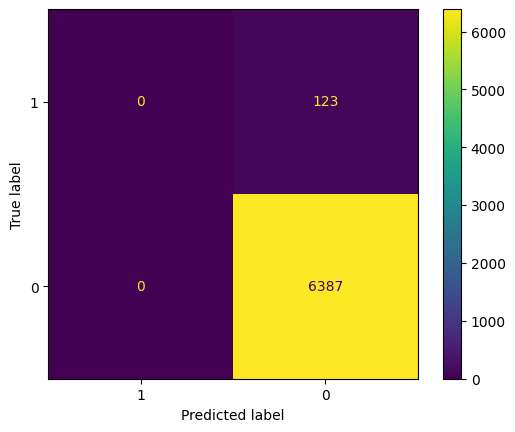

f1_score: 0.0
precision: 0.0
recall: 0.0
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      6387
           1       0.00      0.00      0.00       123

    accuracy                           0.98      6510
   macro avg       0.49      0.50      0.50      6510
weighted avg       0.96      0.98      0.97      6510



C:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

In [486]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)

model = svm.SVC()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

matrix = confusion_matrix(y_test, y_pred, labels=[1, 0])
disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=[1, 0])
disp.plot()
plt.show()
print("f1_score: " + str(f1_score(y_test, y_pred)))
print("precision: " + str(precision_score(y_test, y_pred)))
print("recall: " + str(recall_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))

### i used smote technique to oversample the training data set so that the training wouldn't be biased toward the negative values 

In [487]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)

smote = SMOTE(random_state=42)
x_train, y_train = smote.fit_resample(x_train, y_train)
y_train.value_counts()

stroke
0    36230
1    36230
Name: count, dtype: int64

### Finally, we want to evaluate how much the model is working well. The problem with accuracy is that it can not show the effect of FP here so its not a good metric, so we have to find other ways to evaluate the model, confusion matrix can be a good measurement

In [488]:
model = svm.SVC()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy is:" + str(accuracy))

Accuracy: 0.7311827956989247


### the problem here is that although we have found 92 / 123 = 0.75 of True results, the number of negative class datas are very high and affects the precision and f1_score result where they take account of the FP. why this happens? Because we struggle to find some of the negative datas and predict them to be true, the amount is acceptable in terms of the amount of negative datasets, but it raises the False positive rate and affects presicion considerably, sometimes its ok specially in this problem because the main goal is to find the people who have tendency of having a stroke and the more we find them the better, even if we guess that some people with negative tendancy have the probability to have strokes in the future.

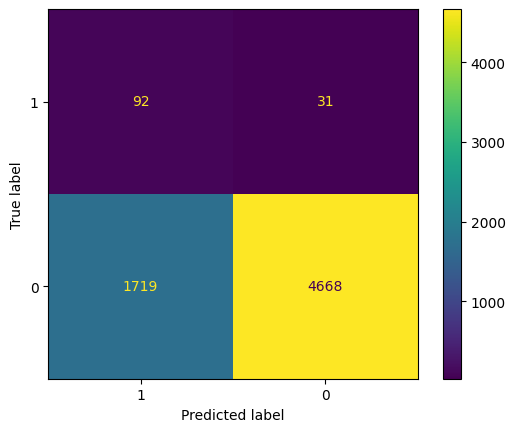

f1_score: 0.09513960703205791
precision: 0.05080066261733849
recall: 0.7479674796747967
              precision    recall  f1-score   support

           0       0.99      0.73      0.84      6387
           1       0.05      0.75      0.10       123

    accuracy                           0.73      6510
   macro avg       0.52      0.74      0.47      6510
weighted avg       0.98      0.73      0.83      6510



In [489]:
from sklearn.metrics import precision_score, recall_score, f1_score
matrix = confusion_matrix(y_test, y_pred, labels=[1, 0])
disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=[1, 0])
disp.plot()
plt.show()
print("f1_score is: " + str(f1_score(y_test, y_pred)))
print("precision is: " + str(precision_score(y_test, y_pred)))
print("recall is: " + str(recall_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))

# Qu2 - Linear Regression

In [513]:
data = pd.read_csv('insurance.csv')

data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


## Feature engineering like Qu1...

In [514]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [515]:
data = pd.get_dummies(data, columns=['sex','smoker','region'], prefix=["sex",'smoker','region'], dtype=int, drop_first=True)
data.head(10)

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0
5,31,25.740,0,3756.62160,0,0,0,1,0
6,46,33.440,1,8240.58960,0,0,0,1,0
7,37,27.740,3,7281.50560,0,0,1,0,0
8,37,29.830,2,6406.41070,1,0,0,0,0
9,60,25.840,0,28923.13692,0,0,1,0,0


In [516]:
feature_columns = ['age', 'bmi']

scaler = MinMaxScaler()

data[feature_columns] = scaler.fit_transform(data[feature_columns])

data.head(10)


,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,0.021739,0.321227,0,16884.92400,0,1,0,0,1
1,0.000000,0.479150,1,1725.55230,1,0,0,1,0
2,0.217391,0.458434,3,4449.46200,1,0,0,1,0
3,0.326087,0.181464,0,21984.47061,1,0,1,0,0
4,0.304348,0.347592,0,3866.85520,1,0,1,0,0
5,0.282609,0.263115,0,3756.62160,0,0,0,1,0
6,0.608696,0.470272,1,8240.58960,0,0,0,1,0
7,0.413043,0.316922,3,7281.50560,0,0,1,0,0
8,0.413043,0.373150,2,6406.41070,1,0,0,0,0
9,0.913043,0.265806,0,28923.13692,0,0,1,0,0


### here we can see that smoking status, age and bmi are effective and relative to target variable using correlation matrix

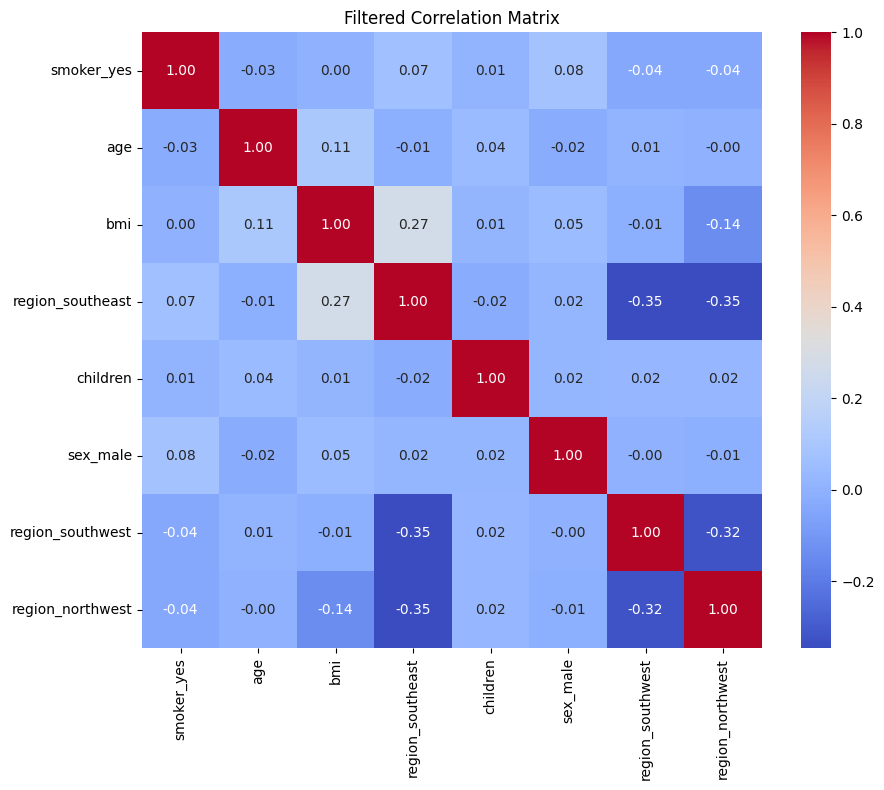

Index(['smoker_yes', 'age', 'bmi', 'region_southeast'], dtype='object')


,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,0.021739,0.321227,0,0,1,0,0,1
1,0.000000,0.479150,1,1,0,0,1,0
2,0.217391,0.458434,3,1,0,0,1,0
3,0.326087,0.181464,0,1,0,1,0,0
4,0.304348,0.347592,0,1,0,1,0,0
5,0.282609,0.263115,0,0,0,0,1,0
6,0.608696,0.470272,1,0,0,0,1,0
7,0.413043,0.316922,3,0,0,1,0,0
8,0.413043,0.373150,2,1,0,0,0,0
9,0.913043,0.265806,0,0,0,1,0,0


In [517]:
import seaborn as sns
import matplotlib.pyplot as plt
cm = data.corr()
target_var = cm['charges'].abs().sort_values(ascending=False)
best_features = target_var[1:].index 
cm = cm.loc[best_features, best_features]

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Filtered Correlation Matrix')
plt.show()

print(best_features[0:4])
x = data.drop(['charges'], axis=1)
y = data['charges']
x.head(10)

mse error for test size 0.25 is: 17713089.1712501
r2_score for test size 0.25 is: 0.7652202878720219
[[11500.73211087]
 [ 9070.59076127]
 [  335.18980169]
 [ -203.7151988 ]
 [23450.47067717]
 [ -569.33212738]
 [ -665.5567837 ]
 [ -954.57402095]]

mse error for test size 0.2 is: 17031804.28610907
r2_score for test size 0.2 is: 0.7805868798739708
[[11415.6298471 ]
 [ 9123.56657684]
 [  339.5897334 ]
 [ -241.96876126]
 [23471.27579398]
 [ -562.35060092]
 [ -512.23876878]
 [ -887.35931713]]

mse error for test size 0.15 is: 15820710.557317983
r2_score for test size 0.15 is: 0.7921987733257756
[[11546.7064883 ]
 [ 8896.59411987]
 [  349.04116756]
 [ -338.05996681]
 [23609.23116378]
 [ -538.25461838]
 [ -482.15899608]
 [ -749.50012871]]

mse error for test size 0.1 is: 16695209.617637057
r2_score for test size 0.1 is: 0.7579620391548458
[[11567.17093493]
 [ 9020.70500826]
 [  376.61955976]
 [ -450.49118031]
 [23778.64121924]
 [ -464.82691735]
 [ -657.56104051]
 [ -923.57414017]]



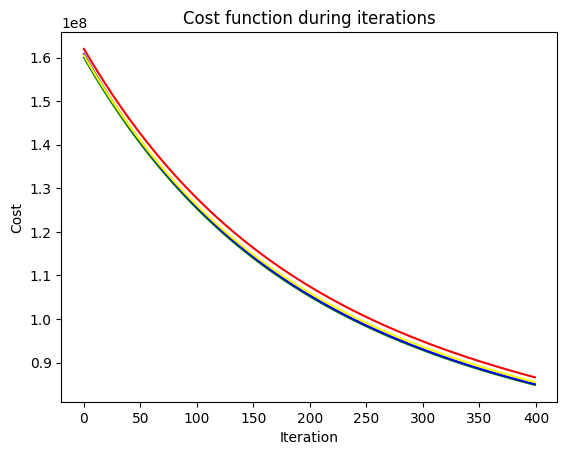

In [511]:
from sklearn.metrics import mean_squared_error, r2_score
# constants and global vars...
w = np.random.uniform(low=-2, high=2, size=(x.shape[1], 1))

bias = 1
learning_rate = 0.001
num_epochs = 50000
error_array = []
def predict(x):
    global w, bias
    y_pred = np.dot(x, w) + b
    return y_pred

def evaluate_error(x, y):
    global w, bias
    m = len(y)
    y_pred = np.dot(x, w) + b
    cost = (1 / (2 * m)) * np.sum(np.square(y_pred - y))
    return cost

def find_gradient(error, m, x):
    gw = (1 / m) * np.dot(x.T, error)
    gbias = (1 / m) * np.sum(error)
    return gbias, gw

def fit(x, y):
    global w, bias, learning_rate, num_epochs, error_array
    for epoch in range(num_epochs):
        y_pred = predict(x)
        error = y_pred - y
        gbias, gw = find_gradient(error, len(y), x)
        w -= learning_rate * gw
        bias -= learning_rate * gbias
        cost = evaluate_error(x, y)
        error_array.append(cost)

x = np.array(x)

y = np.array(y).reshape((x.shape[0], 1))

sizes = [0.25, 0.2, 0.15, 0.1]
colors = ['green', 'blue', 'yellow', 'red']

for i in range(len(sizes)):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=sizes[i], random_state=42)

    fit(x_train, y_train)

    y_pred = predict(x_test)

    mse = evaluate_error(x_test, y_test)
    print("mse error for test size {} is: {}".format(sizes[i], mse))
    print("r2_score for test size {} is: {}".format(sizes[i], r2_score(y_test, y_pred)))
    print(w)
    print()
    
    plt.plot(error_array[:400], color=colors[i])
    error_array = []
    
    w = np.random.uniform(low=-2, high=2, size=(x.shape[1], 1))

    b = 1
    
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Cost function during iterations")
plt.show()

### here we can see that setting the test size to 0.15 creates the lowest mse error and r2_score so we choose 0.15 test split.
### also by printing the weights, we can see that the weight of age, BMI and smoking status is higher than other weights, so they have more impact on target variable and are more relevant in the prediction of the model( we also previously saw that its also correct in correlation matrix).

In [463]:
def transform(x, degree):
    res = np.empty((x.shape[0], 0))

    for j in range(1, degree + 1):
            x_pow = np.power(x, j)
            res = np.append(res, x_pow, axis=1)
    return res

x = np.array(x)
x_t = transform(x, 3)
y = np.array(y).reshape((x_t.shape[0], 1))
w = np.random.uniform(low=-2, high=2, size=(x_t.shape[1], 1))
error_array = []
x_train, x_test, y_train, y_test = train_test_split(x_t, y_reshaped, test_size=0.15, random_state=42)

fit(x_train, y_train)

y_pred = predict(x_test)

mse = evaluate_error(x_test, y_test)
print("cost function", mse)

cost function 15646725.14344529


In [394]:
print(r2_score(y_test, y_pred))

0.7955683927764547


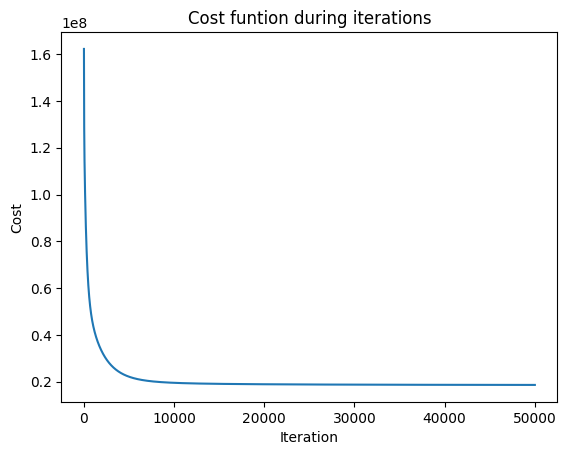

In [395]:
plt.plot(error_array)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Cost funtion during iterations")
plt.show()